<a href="https://www.kaggle.com/bandhansingh/polynomial-reg-clg?scriptVersionId=90206319" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as mysea
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [2]:
mydata = pd.read_csv("../input/housing-data-for-polynomial-reg/housing.csv")
mydata.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


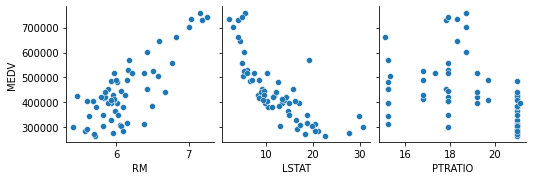

In [3]:
mysea.pairplot(mydata, x_vars=['RM','LSTAT','PTRATIO'],y_vars='MEDV')

<AxesSubplot:>

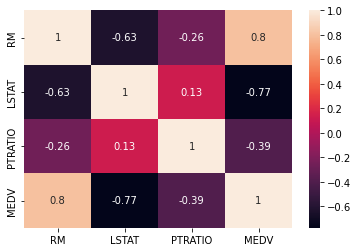

In [4]:
mysea.heatmap(mydata.corr(),annot=True)

In [5]:
#Split the data
X = mydata.LSTAT
y = mydata.MEDV

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=10)
X_train, X_test, y_train, y_test = (X_train.to_numpy().reshape(-1,1), X_test.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1), y_test.to_numpy().reshape(-1,1))

# Reordering the data
import operator
sort_axis=operator.itemgetter(0)
sorted_zip=sorted(zip(X_train,y_train),key=sort_axis)
X_train,y_train=zip(*sorted_zip)

sort_axis=operator.itemgetter(0)
sorted_zip=sorted(zip(X_test,y_test),key=sort_axis)
X_test,y_test=zip(*sorted_zip)

In [6]:

def create_poly(deg):
    poly_reg = PolynomialFeatures(degree=deg)
    X_train_poly = poly_reg.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly,y_train)
    pred_train_y = lin_reg.predict(X_train_poly)
    plt.plot(X_train, pred_train_y, color='blue')
    
    rmse = np.sqrt(mse(y_train,pred_train_y))
    rtwo_train = r2(y_train,pred_train_y)
    print("Degree = ",deg)
    print("Training Rmse = ",rmse)
    print("Training R^2 = ",rtwo_train)
    
    
    X_test_poly = poly_reg.fit_transform(X_test)
    pred_test_y = lin_reg.predict(X_test_poly)
    
    rmse = np.sqrt(mse(y_test,pred_test_y))
    rtwo_test = r2(y_test,pred_test_y)
    print("Degree = ",deg)
    print("Testing Rmse = ",rmse)
    print("Testing R^2 = ",rtwo_test)
    print("\n")
    
    return rtwo_train, rtwo_test

Degree =  1
Training Rmse =  78161.98479225274
Training R^2 =  0.5699983790966727
Degree =  1
Testing Rmse =  89380.09545152845
Testing R^2 =  0.6423259703845199


Degree =  2
Training Rmse =  65488.386098288
Training R^2 =  0.6981386498903226
Degree =  2
Testing Rmse =  58251.711076363914
Testing R^2 =  0.84807713113477


Degree =  3
Training Rmse =  62760.595469207066
Training R^2 =  0.7227618158788336
Degree =  3
Testing Rmse =  52699.79419000439
Testing R^2 =  0.8756563482598241


Degree =  5
Training Rmse =  60400.30736828221
Training R^2 =  0.7432223428704128
Degree =  5
Testing Rmse =  53196.491204051425
Testing R^2 =  0.873301417975135


Degree =  10
Training Rmse =  57576.59944602929
Training R^2 =  0.7666697979388688
Degree =  10
Testing Rmse =  52135.94169201946
Testing R^2 =  0.8783029015067475


Degree =  15
Training Rmse =  77603.97112948865
Training R^2 =  0.576116193700999
Degree =  15
Testing Rmse =  87712.16624985187
Testing R^2 =  0.655550583512888


Degree =  20
Tra

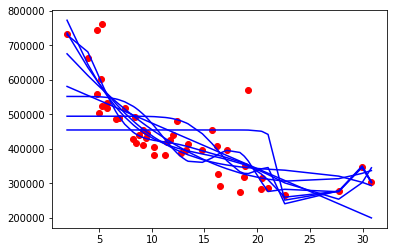

In [7]:
deg = [1,2,3,5,10,15,20,50]
rtwo_train = np.array([])
rtwo_test = np.array([])

for i in deg:
    r_train, r_test = create_poly(i)
    rtwo_train = np.append(rtwo_train, r_train)
    rtwo_test = np.append(rtwo_test, r_test)
        
print("\n")
print("Training R^2 array = ",rtwo_train)
print("Testing R^2 array = ",rtwo_test)
plt.scatter(X_train,y_train,color='red')

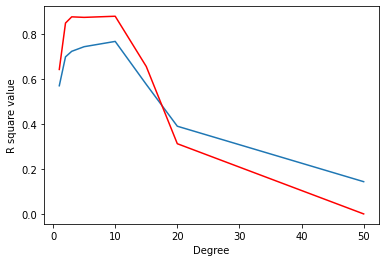

In [8]:
#hw store r2 value in array and plot the graph of r2 and degree
plt.xlabel("Degree")
plt.ylabel("R square value")
plt.plot(deg,rtwo_train)
plt.plot(deg,rtwo_test,color='red',label='test')